# Importing packages

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import numpy as np

# Loading the data and reviewing

In [270]:
df = pd.read_csv('insurance-adapted.csv')

In [272]:
# Displaying first few rows ofthe dataframe to get an overview of its data and initial strucutre
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [274]:
# looking at the value counts of smoker feature
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [276]:
# looking at the value counts of sex feature
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [278]:
# looking at the value counts of region feature
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [280]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


# Encoding data

In [283]:
# Encoding sex and smoking status
df['sex']=df['sex'].apply(lambda X: 1 if X=='male' else 0)
df['smoker']=df['smoker'].apply(lambda X:1 if X=='yes' else 0)

In [285]:
#After encoding sex and smoking status
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,southwest,16884.92400
1,18.0,1,33.770,1,0,southeast,1725.55230
2,28.0,1,33.000,3,0,southeast,4449.46200
3,33.0,1,22.705,0,0,northwest,21984.47061
4,32.0,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,northwest,10600.54830
1334,18.0,0,31.920,0,0,northeast,2205.98080
1335,18.0,0,36.850,0,0,southeast,1629.83350
1336,21.0,0,25.800,0,0,southwest,2007.94500


In [287]:
# One hot encoding the 'region' feature
pd.get_dummies(df.region, dtype=int)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [289]:
# Joining this with already excisting dataframe 
df.join(pd.get_dummies(df.region, dtype=int))

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19.0,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18.0,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28.0,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18.0,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18.0,0,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21.0,0,25.800,0,0,southwest,2007.94500,0,0,0,1


In [291]:
# dropping the region column
df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19.0,0,27.900,0,1,16884.92400,0,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,10600.54830,0,1,0,0
1334,18.0,0,31.920,0,0,2205.98080,1,0,0,0
1335,18.0,0,36.850,0,0,1629.83350,0,0,1,0
1336,21.0,0,25.800,0,0,2007.94500,0,0,0,1


In [293]:
# updating the 'df' with above created dataframe
df=df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)

In [295]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19.0,0,27.900,0,1,16884.92400,0,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,10600.54830,0,1,0,0
1334,18.0,0,31.920,0,0,2205.98080,1,0,0,0
1335,18.0,0,36.850,0,0,1629.83350,0,0,1,0
1336,21.0,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

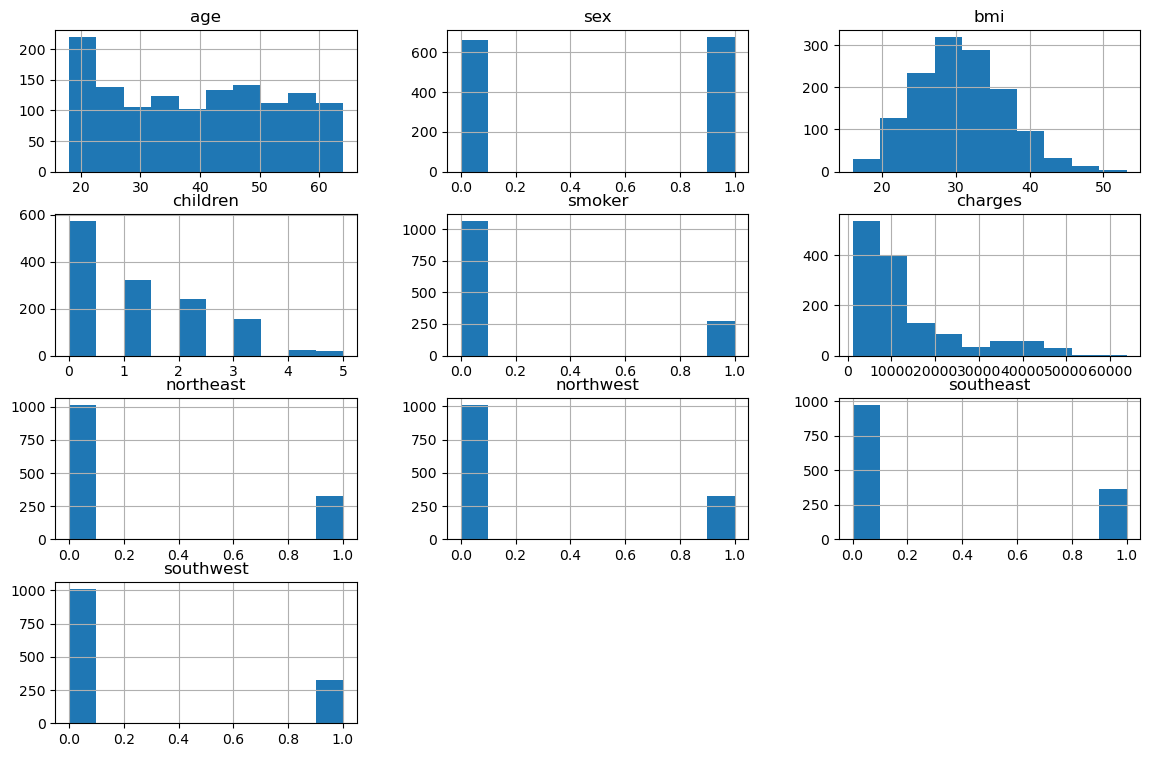

In [297]:
# plotting histograms
df.hist(figsize=(14,9))

In [299]:
# checking for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1318 non-null   float64
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(3), int32(4), int64(3)
memory usage: 83.8 KB


<Axes: >

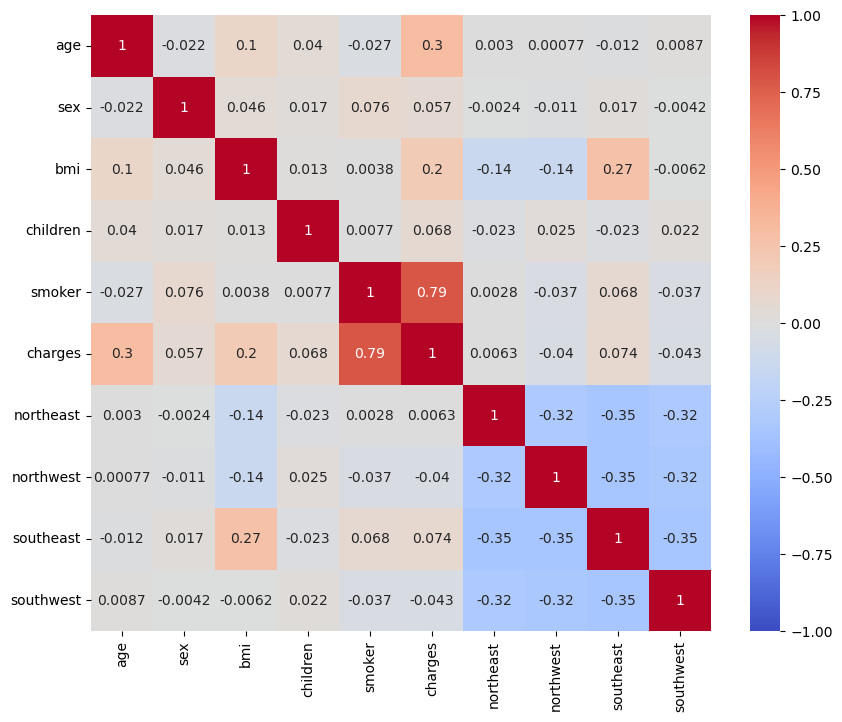

In [301]:
# finding the corerelation 

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',vmin=-1,vmax=1)

# in the following figure, if something is very red, it mean it has postive correlation 
# and if something is very blue, it has a negative correlation

##### according to heatmap there is a strong correlationship between the smoker vs charges but we need to train a random forest model to find the feature importance and check if they are differ from the feature correlation



In [304]:
X= df.drop('charges',axis=1)
y = df['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [312]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [314]:
model.score(X_test,y_test)

0.8553068192291701

In [316]:
y_pred=model.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)

In [318]:
rmse

4942.119309477952

In [320]:
df.charges.std()

12110.011236693994

In [322]:
y_test.std()

13016.701931695741

In [324]:
df.charges.median()

9382.033

In [328]:
mae=mean_absolute_error(y_pred,y_test)
mae

2799.0103389178034

Text(0.5, 1.0, 'Prediction VS Truth')

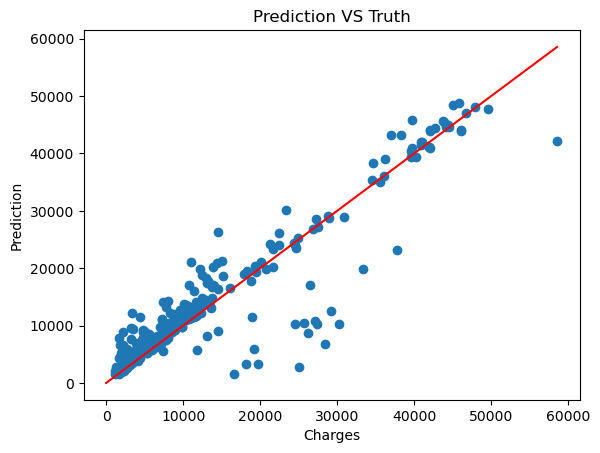

In [338]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction VS Truth')

In [346]:
feature_importances = sorted(zip(model.feature_names_in_,model.feature_importances_), key=lambda x:x[1], reverse=True)

Text(0.5, 1.0, 'Feature Importances')

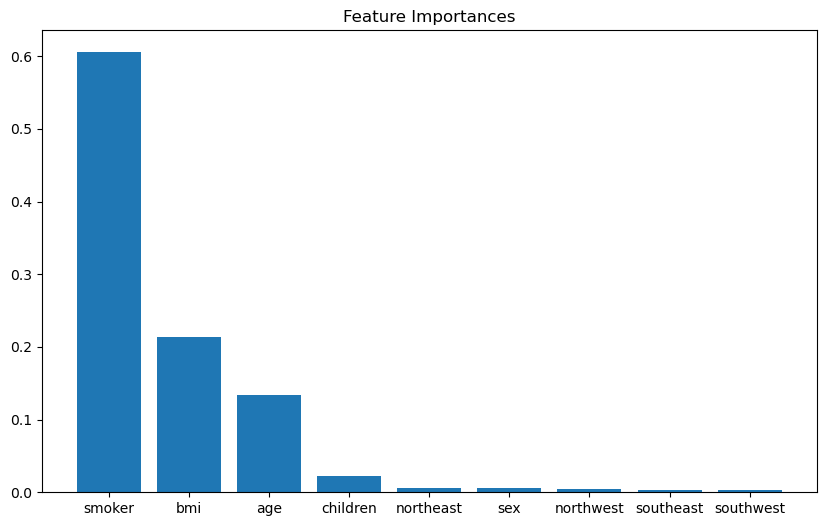

In [352]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title('Feature Importances')

In [354]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[None,2,5],
    'min_samples_split':[2,4,5,8],
    'min_samples_leaf':[1,2,4,6]
}



In [356]:
model = RandomForestRegressor(n_jobs=-1)
grid_search=GridSearchCV(model,param_grid=param_grid, cv=5)

In [360]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 5, 8]})

In [362]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 8}

In [364]:
model=grid_search.best_estimator_

In [366]:
model

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=8,
                      n_jobs=-1)

In [368]:
model.score(X_test,y_test)

0.8723677106722662

In [376]:
y_pred = model.predict(X_test)

In [380]:
rmse=root_mean_squared_error(y_test,y_pred)

In [382]:
rmse

4641.618830693498

In [384]:
mae=mean_absolute_error(y_test,y_pred)

In [386]:
mae

2746.7769217969544

Text(0.5, 1.0, 'Prediction VS Truth')

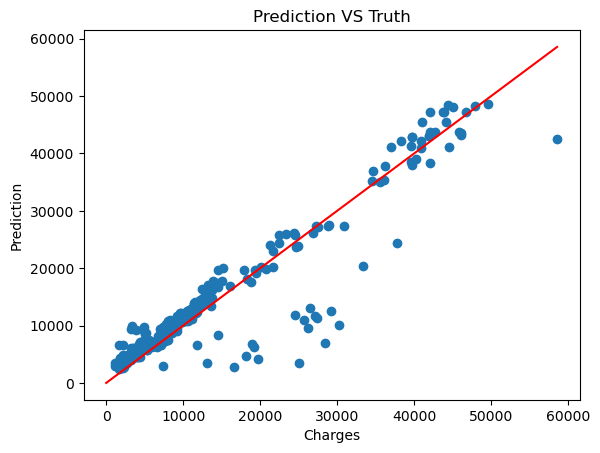

In [388]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(0,max(y_test)), np.linspace(0,max(y_test)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction VS Truth')